In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
# from google.colab import files
# uploaded = files.upload()

In [127]:
train_df = pd.read_csv('train.csv')
print(train_df.shape)
train_df.head()

(45528, 19)


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [128]:
train_df.drop(['customer_id','name'],axis=1,inplace=True)

## Handeling category columns

In [129]:
def encode_binary(data,val):
    if data==val:
        return 1
    return 0

train_df['gender'] = train_df['gender'].apply(lambda x: encode_binary(x,'M'))
train_df['owns_car'] = train_df['owns_car'].apply(lambda x: encode_binary(x,'Y'))
train_df['owns_house'] = train_df['owns_house'].apply(lambda x: encode_binary(x,'Y'))

train_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0,0,1,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,1,0,1,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,1,0,1,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,0,0,1,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,1,1,1,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [130]:
train_df['no_of_children'].value_counts()

0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
9.0        1
8.0        1
Name: no_of_children, dtype: int64

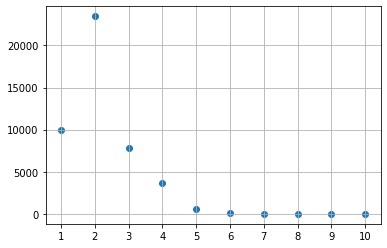

In [131]:
dd=train_df['total_family_members'].value_counts()

# plotting to see the counts
x_val,y_val = [int(i) for i in dict(dd).keys()],[int(i) for i in dict(dd).values()]
plt.scatter(x_val,y_val)
plt.xticks(x_val)
# plt.yticks(y_val)
plt.grid()

In [132]:
train_df['occupation_type'].value_counts()

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

In [133]:
occupation_level = {
    'Unknown': 0,
    'Low-skill Laborers': 1,
    'Laborers': 2,
    'Cleaning staff': 3,
    'Drivers': 4,
    'Waiters/barmen staff': 5,
    'Cooking staff': 6,
    'Security staff': 7,
    'Secretaries': 8,
    'Realty agents': 9,
    'Sales staff': 10,
    'Accountants': 11,
    'Core staff': 12,
    'Medicine staff': 13,
    'Private service staff': 14,                  
    'Managers': 15,
    'HR staff': 16,
    'High skill tech staff': 17, 
    'IT staff': 18
}
train_df.replace({"occupation_type":occupation_level},inplace=True)
train_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0,0,1,0.0,107934.04,612.0,0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,1,0,1,0.0,109862.62,2771.0,2,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,1,0,1,0.0,230153.17,204.0,2,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,0,0,1,0.0,122325.82,11941.0,12,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,1,1,1,0.0,387286.00,1459.0,12,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [134]:
train_df['migrant_worker'].value_counts()

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

In [135]:
train_df['prev_defaults'].value_counts()

0    43060
1     2172
2      296
Name: prev_defaults, dtype: int64

In [136]:
train_df['default_in_last_6months'].value_counts()

0    43227
1     2301
Name: default_in_last_6months, dtype: int64

## Handeling missing values

In [137]:
train_df.isnull().sum()

age                          0
gender                       0
owns_car                     0
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [138]:
# column with potential category values
null_value_cols =  ['no_of_children','total_family_members','migrant_worker']
for col in null_value_cols:
    print('\n\t '+col.replace('_',' ').upper())
    print(train_df[col].value_counts())
    print('\nMode : ',train_df[col].mode())


	 NO OF CHILDREN
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
9.0        1
8.0        1
Name: no_of_children, dtype: int64

Mode :  0    0.0
dtype: float64

	 TOTAL FAMILY MEMBERS
2.0     23455
1.0      9913
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
10.0        2
9.0         1
Name: total_family_members, dtype: int64

Mode :  0    2.0
dtype: float64

	 MIGRANT WORKER
0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

Mode :  0    0.0
dtype: float64


In [139]:
null_value_cols =  ['no_of_children','total_family_members','migrant_worker']
for col in null_value_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [140]:
train_df.corr()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
age,1.000000,-0.004315,-0.006826,0.002367,-0.008340,0.004079,0.000506,-0.002223,-0.010643,-0.005576,-0.002453,0.004473,-0.005529,0.000817,0.001393,-0.001406,-0.000983
gender,-0.004315,1.000000,0.342915,-0.041853,0.055356,0.028120,-0.154530,-0.100799,0.088367,0.134929,0.081721,0.026988,0.019465,-0.032570,0.049822,0.045886,0.057579
owns_car,-0.006826,0.342915,1.000000,0.005821,0.103379,0.031740,-0.150815,0.058897,0.149466,0.094016,0.133767,0.030387,-0.002469,0.008156,-0.011274,-0.015965,-0.017104
owns_house,0.002367,-0.041853,0.005821,1.000000,-0.004777,0.003015,0.061901,-0.028834,0.003777,-0.025227,-0.003845,0.003172,0.001453,0.002121,0.003068,-0.002221,-0.002693
no_of_children,-0.008340,0.055356,0.103379,-0.004777,1.000000,0.009006,-0.240139,0.119482,0.869968,0.070504,0.028349,0.009427,0.006783,-0.014882,0.019031,0.021382,0.023262
net_yearly_income,0.004079,0.028120,0.031740,0.003015,0.009006,1.000000,-0.029367,0.026791,0.010442,0.001501,0.076958,0.993378,0.002696,-0.009688,-0.004696,0.015092,0.011508
no_of_days_employed,0.000506,-0.154530,-0.150815,0.061901,-0.240139,-0.029367,1.000000,-0.463389,-0.229128,-0.219402,-0.104545,-0.027745,-0.018720,0.035533,-0.036232,-0.034295,-0.047043
occupation_type,-0.002223,-0.100799,0.058897,-0.028834,0.119482,0.026791,-0.463389,1.000000,0.113917,0.040335,0.119057,0.025427,0.001926,0.002886,-0.015253,-0.018072,-0.012603
total_family_members,-0.010643,0.088367,0.149466,0.003777,0.869968,0.010442,-0.229128,0.113917,1.000000,0.080674,0.078646,0.010261,0.001976,-0.011466,0.010559,0.013422,0.010740
migrant_worker,-0.005576,0.134929,0.094016,-0.025227,0.070504,0.001501,-0.219402,0.040335,0.080674,1.000000,0.014304,-0.000095,0.010352,-0.013284,0.029219,0.030003,0.034018


In [141]:
train_df['no_of_days_employed'].mean()

67609.2892932431

-  can not see any corelation between missing value cols which is continous , so will replace them with mean value of that col 

In [142]:
null_col_cont = ['no_of_days_employed','yearly_debt_payments','credit_score']
for col in null_col_cont:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
train_df.isnull().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [143]:
y_ = train_df['credit_card_default']
x_ = train_df.drop(['credit_card_default'],axis=1)

In [145]:
# dataset is highly unbalanced , so using over sampling technique to make it balanced
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import ClusterCentroids
over_sample = SMOTE()
# under_sample = ClusterCentroids()
x_train, y_train = over_sample.fit_resample(x_, y_)
x_train

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,46,0,0,1,0.000000,107934.040000,612.000000,0,1.000000,1.0,33070.280000,18690.930000,73,544.000000,2,1
1,29,1,0,1,0.000000,109862.620000,2771.000000,2,2.000000,0.0,15329.530000,37745.190000,52,857.000000,0,0
2,37,1,0,1,0.000000,230153.170000,204.000000,2,2.000000,0.0,48416.600000,41598.360000,43,650.000000,0,0
3,39,0,0,1,0.000000,122325.820000,11941.000000,12,2.000000,0.0,22574.360000,32627.760000,20,754.000000,0,0
4,46,1,1,1,0.000000,387286.000000,1459.000000,12,1.000000,0.0,38282.950000,52950.640000,75,927.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83657,40,1,1,0,1.637861,195517.097578,1534.225037,4,3.275722,1.0,38121.684685,29178.974266,90,610.382674,1,1
83658,39,0,0,0,0.000000,60649.002606,1343.759070,5,1.653064,0.0,13244.538803,8707.094364,85,649.102338,0,0
83659,40,0,0,1,0.000000,435058.670286,234.887889,2,2.000000,0.0,41889.453819,111891.126423,75,578.868336,1,1
83660,40,0,0,1,1.624634,125070.469658,797.877889,11,3.624634,0.0,26667.196007,47278.529378,94,602.542402,0,0


## Trying scaling , regularization 

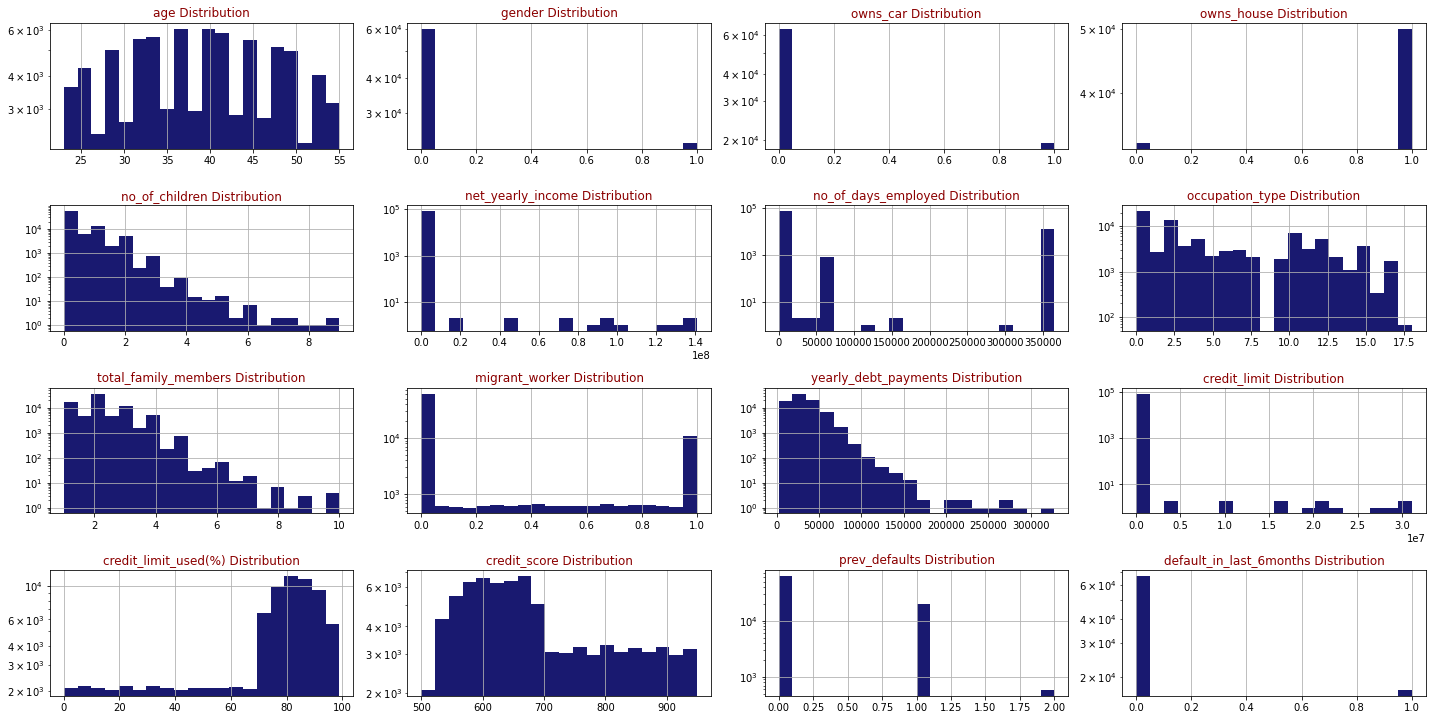

In [146]:
def plot_columns(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

plot_columns(x_train,x_train.columns,8,4)

In [147]:
from sklearn.preprocessing import StandardScaler

# X = train_df.drop(['credit_card_default'],axis=1)

std_scale = StandardScaler()
std_scale.fit(x_train)

StandardScaler()

In [148]:
std_scale.mean_

array([3.87897612e+01, 2.79708828e-01, 2.30869451e-01, 5.97356028e-01,
       4.39046646e-01, 2.07461127e+05, 5.72384364e+04, 5.38017260e+00,
       2.17071563e+00, 1.99393991e-01, 3.14086271e+04, 4.51937086e+04,
       6.67322799e+01, 6.99007331e+02, 2.54380722e-01, 2.03485453e-01])

In [123]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scale = MinMaxScaler()
# min_max_scale.fit(X)

In [150]:
# from sklearn.model_selection import train_test_split

# y_train = train_df['credit_card_default']
# x_train = train_df.drop(['credit_card_default'],axis=1)

# scaling transform
x_train_scaled = std_scale.transform(x_train)
# x_train = min_max_scale.transform(X)

print(x_train_scaled.shape)


(83662, 16)


In [151]:
from sklearn.decomposition import PCA

# pca applying in scaled data
pca = PCA()
pca.fit(x_train_scaled)
print('pca components: ',pca.components_.shape)

k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k =k + 1  
print(k)
pca = PCA(n_components = k, whiten = True)
x_train_scaled_pca = pca.fit_transform(x_train_scaled)
x_train_scaled_pca.shape

pca components:  (16, 16)
13


(83662, 13)

In [152]:
y_train.value_counts() # this shows how imbalanced the dataset is

1    41831
0    41831
Name: credit_card_default, dtype: int64

## Testing with ML model ( train_df )
- testing with various algorithms by using Kfold and cross_val_Score

In [153]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [154]:
K_fold = KFold(n_splits=10, shuffle=True,random_state=1234)
clf_dict = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors=10),
    "SVM":LinearSVC(),
    "Random Forest":RandomForestClassifier(),
    "XGB":XGBClassifier(n_jobs=-1)
}

In [155]:
def model_test(x,y,clf_dict):
    for clf in clf_dict.values():
#         print(clf_dict[clf])
        model = clf
        score_list = cross_val_score(clf,x,y,cv=K_fold,n_jobs=-1,scoring='f1')
        print('\nModel : '+str(clf))
        print('all f1 scores : ',score_list)
        print('Avg. score : ',round(np.mean(score_list)*100,2))

In [156]:
# testing on normal dataset
model_test(x_train,y_train,clf_dict)


Model : LogisticRegression()
all f1 scores :  [0.94039889 0.93759477 0.93939755 0.9382199  0.93763946 0.93739029
 0.94307197 0.93247211 0.93756689 0.93431167]
Avg. score :  93.78


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.83301946 0.83051921 0.82749868 0.83280889 0.83259259 0.82731769
 0.82302772 0.83412926 0.82488775 0.83502671]
Avg. score :  83.01

Model : LinearSVC()
all f1 scores :  [0.57867853 0.69927895 0.82591818 0.88032497 0.70223868 0.82203213
 0.84060956 0.82643644 0.19020426 0.84720018]
Avg. score :  72.13

Model : RandomForestClassifier()
all f1 scores :  [0.98768906 0.98519834 0.98734787 0.98822144 0.98802682 0.98713673
 0.98955296 0.9874567  0.98755287 0.98627544]
Avg. score :  98.74

Model : XGBClassifier(n_jobs=-1)
all f1 scores :  [0.98059268 0.97982641 0.98306298 0.98179697 0.98079203 0.97981348
 0.98351185 0.97862794 0.97997842 0.97947696]
Avg. score :  98.07


In [157]:
# testing on normal_scaled dataset
model_test(x_train_scaled,y_train,clf_dict)


Model : LogisticRegression()
all f1 scores :  [0.96821687 0.96755162 0.97085982 0.96765847 0.96741855 0.97012802
 0.97045289 0.96820123 0.96968968 0.96756693]
Avg. score :  96.88


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.97318097 0.96695284 0.97200957 0.97229042 0.96867183 0.97338223
 0.97133911 0.96687958 0.96969697 0.96941896]
Avg. score :  97.04

Model : LinearSVC()
all f1 scores :  [0.96815584 0.96843345 0.97162017 0.96782527 0.96733429 0.97053603
 0.97087613 0.96908682 0.9700829  0.96771152]
Avg. score :  96.92

Model : RandomForestClassifier()
all f1 scores :  [0.98746926 0.98660344 0.98843095 0.98752354 0.9873145  0.98725432
 0.98907502 0.98758357 0.98705384 0.98602889]
Avg. score :  98.74

Model : XGBClassifier(n_jobs=-1)
all f1 scores :  [0.98070216 0.98030019 0.98342673 0.98179697 0.98113208 0.97981348
 0.98362235 0.97874852 0.98021345 0.97994135]
Avg. score :  98.1


In [158]:
# testing on normal_scaled_pca dataset
model_test(x_train_scaled_pca,y_train,clf_dict)


Model : LogisticRegression()
all f1 scores :  [0.96821687 0.96767343 0.97085982 0.96777229 0.9673031  0.97049413
 0.97057755 0.96833116 0.96982085 0.96768106]
Avg. score :  96.89

Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.97353146 0.96719775 0.97141496 0.97176855 0.97068945 0.97252034
 0.96921049 0.96838877 0.96889952 0.96986044]
Avg. score :  97.03

Model : LinearSVC()
all f1 scores :  [0.9685021  0.96855494 0.9718664  0.96782527 0.96733429 0.97065089
 0.97099347 0.96872038 0.97021379 0.96771152]
Avg. score :  96.92

Model : RandomForestClassifier()
all f1 scores :  [0.98065268 0.9787134  0.98446834 0.98164387 0.98096598 0.98163725
 0.98117761 0.97928749 0.98062342 0.98057681]
Avg. score :  98.1

Model : XGBClassifier(n_jobs=-1)
all f1 scores :  [0.97209951 0.96898771 0.97628411 0.97200187 0.97187611 0.97349511
 0.97350674 0.96858762 0.97316723 0.97122049]
Avg. score :  97.21


## Preparing testing dataset

- have done the same preprocessing done for training dataset
    - converting string based category cols to numerical category
    - handeling null values

In [159]:
# from google.colab import files
# uploaded = files.upload()

In [160]:
test_df = pd.read_csv('test.csv')
test_df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [161]:
# storing values for sample submission
customer_ids = test_df['customer_id'].values

In [162]:
test_df.drop(['customer_id','name'],axis=1,inplace=True)

def encode_binary(data,val):
    if data==val:
        return 1
    return 0

test_df['gender'] = test_df['gender'].apply(lambda x: encode_binary(x,'M'))
test_df['owns_car'] = test_df['owns_car'].apply(lambda x: encode_binary(x,'Y'))
test_df['owns_house'] = test_df['owns_house'].apply(lambda x: encode_binary(x,'Y'))

occupation_level = {
    'Unknown': 0,
    'Low-skill Laborers': 1,
    'Laborers': 2,
    'Cleaning staff': 3,
    'Drivers': 4,
    'Waiters/barmen staff': 5,
    'Cooking staff': 6,
    'Security staff': 7,
    'Secretaries': 8,
    'Realty agents': 9,
    'Sales staff': 10,
    'Accountants': 11,
    'Core staff': 12,
    'Medicine staff': 13,
    'Private service staff': 14,                  
    'Managers': 15,
    'HR staff': 16,
    'High skill tech staff': 17, 
    'IT staff': 18
}
test_df.replace({"occupation_type":occupation_level},inplace=True)
test_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,52,0,1,0,0.0,232640.53,998.0,0,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,48,0,0,0,1.0,284396.79,1338.0,0,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,50,0,0,0,1.0,149419.28,1210.0,0,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,30,0,0,0,1.0,160437.54,503.0,2,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,52,1,0,1,0.0,233480.37,157.0,2,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [163]:
null_value_cols =  ['no_of_children','total_family_members','migrant_worker']
for col in null_value_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
null_col_cont = ['no_of_days_employed','yearly_debt_payments','credit_score']
for col in null_col_cont:
    test_df[col] = test_df[col].fillna(test_df[col].mean())

test_df.isnull().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [164]:
test_x = test_df.copy()

# scaling test values with the same StandardScaler model
test_x_scaled = std_scale.transform(test_df)

# reducing dims of test values with pca model
test_x_scaled_pca = pca.transform(test_x_scaled)

# test_x

## Testing final model

 - as we can see in above trials with different algorithms , random forest and XgBoost performed well.
 

In [168]:
# getting random forest result
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(x_train,y_train)
y_pred = clf.predict(test_x)

# clf.fit(x_train_scaled,y_train)
# y_pred = clf.predict(test_x_scaled)

# clf.fit(x_train_scaled_pca,y_train)
# y_pred = clf.predict(test_x_scaled_pca)


final_res = [[customer_ids[i],y_pred[i]] for i in range(len(y_pred))]
my_sub = pd.DataFrame(final_res,columns=['customer_id','credit_card_default'])
my_sub.to_csv("rf_scaled_pca.csv",index=False)

In [173]:
# getting logistic regression result
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()

# clf.fit(x_train,y_train)
# y_pred = clf.predict(test_x)

clf.fit(x_train_scaled,y_train)
y_pred = clf.predict(test_x_scaled)

# clf.fit(x_train_scaled_pca,y_train)
# y_pred = clf.predict(test_x_scaled_pca)


final_res = [[customer_ids[i],y_pred[i]] for i in range(len(y_pred))]
my_sub = pd.DataFrame(final_res,columns=['customer_id','credit_card_default'])
my_sub.to_csv("lr_scaled.csv",index=False)

In [177]:
# getting SVM result
from sklearn.svm import LinearSVC

clf_svc = LinearSVC()

clf.fit(x_train,y_train)
y_pred = clf.predict(test_x)

# clf.fit(x_train_scaled,y_train)
# y_pred = clf.predict(test_x_scaled)

# clf.fit(x_train_scaled_pca,y_train)
# y_pred = clf.predict(test_x_scaled_pca)


final_res = [[customer_ids[i],y_pred[i]] for i in range(len(y_pred))]
my_sub = pd.DataFrame(final_res,columns=['customer_id','credit_card_default'])
my_sub.to_csv("svm.csv",index=False)

In [180]:
# XG boost result

clf = XGBClassifier(n_jobs=-1)

# clf.fit(x_train,y_train)
# y_pred = clf.predict(test_x)

# clf.fit(x_train_scaled,y_train)
# y_pred = clf.predict(test_x_scaled)

clf.fit(x_train_scaled_pca,y_train)
y_pred = clf.predict(test_x_scaled_pca)

final_res = [[customer_ids[i],y_pred[i]] for i in range(len(y_pred))]
my_sub = pd.DataFrame(final_res,columns=['customer_id','credit_card_default'])
my_sub.to_csv("xgb_scaled_pca.csv",index=False)

In [183]:
clf = KNeighborsClassifier(n_neighbors=12)

clf.fit(x_train,y_train)
y_pred = clf.predict(test_x)

# clf.fit(x_train_scaled,y_train)
# y_pred = clf.predict(test_x_scaled)

# clf.fit(x_train_scaled_pca,y_train)
# y_pred = clf.predict(test_x_scaled_pca)

final_res = [[customer_ids[i],y_pred[i]] for i in range(len(y_pred))]
my_sub = pd.DataFrame(final_res,columns=['customer_id','credit_card_default'])
my_sub.to_csv("knn.csv",index=False)